# Steps for Classification Task

* Data Pre-processing
> tokenize and remove stop words


```
import pandas as pd

df = pd.read_csv('./sentences_and_tags.csv')

#do pre-processing on df['Sentences'] column:
```


* Feature Extraction
> concert text to numerical features
>> TD-IDF vectorization

```
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = df["Sentences"]
y = df["Tag"]

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

```
* Text Classification Model
> Try out different models
>* Logistic Regression as a baseline
>* Naive Bayes, good for limited data and text classification
>* Random Forest & Decision Trees
>* XGBoost, LightGBM, and CatBoost
>* Neural Networks

* Test Model with unseen data

* Compare Metrics
>* Max Accuracy
>* Precision
>* Recall
>* F1-Score
>* Min Log Loss



# **Pre-processing**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('./sentences_and_tags.csv')

# do pre-processing on df['Sentences'] column:

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Load your dataset
df_2 = pd.read_csv('sentences_and_tags.csv')

In [ ]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenization: Split text into words
    words = word_tokenize(text.lower())
    # Remove punctuation and numbers
    words = [word for word in words if word.isalpha()]
    # Remove stopwords (common words that don't carry much meaning)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatization: Reduce words to their base or dictionary form
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return words
df_2['Sentences'] = df_2['Sentences'].apply(lambda x: preprocess_text(x))
print(df_2['Sentences'][0])

['first', 'noticed', 'tinnitus', 'attending', 'loud', 'concert', 'two', 'year', 'ago']


# **Feature Extraction**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split


In [ ]:
data = pd.read_csv("sentences_and_tags.csv")


In [ ]:
#Split the dataset into features (sentences) and labels (Name Tags):
sentences = data['Sentences']
name_tags = data['Name Tag']


In [ ]:
#Perform feature extraction using techniques like Count Vectorization or TF-IDF Vectorization.
#a. Count Vectorization:
count_vectorizer = CountVectorizer()
sentence_vectors = count_vectorizer.fit_transform(sentences)


In [ ]:
#b.TF-IDF Vectorization:
tfidf_vectorizer = TfidfVectorizer()
sentence_vectors = tfidf_vectorizer.fit_transform(sentences)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sentence_vectors, name_tags, test_size=0.2, random_state=42)


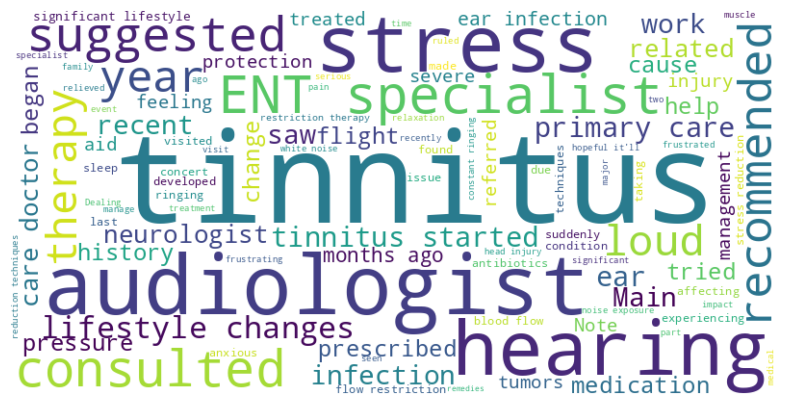

In [ ]:
#Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(sentences))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

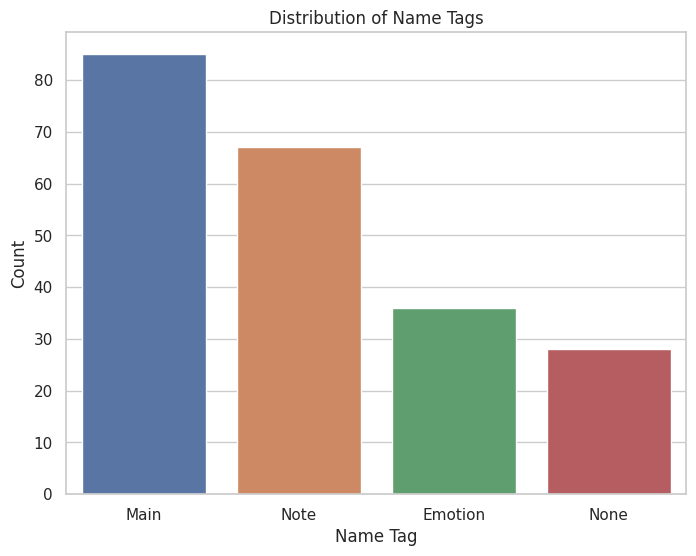

In [ ]:
#Histogram of Name Tags
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x="Name Tag", data=data)
plt.xlabel("Name Tag")
plt.ylabel("Count")
plt.title("Distribution of Name Tags")
plt.show()


<ipython-input-26-18fdd55a6467>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=name_tag_colors, cmap='viridis')


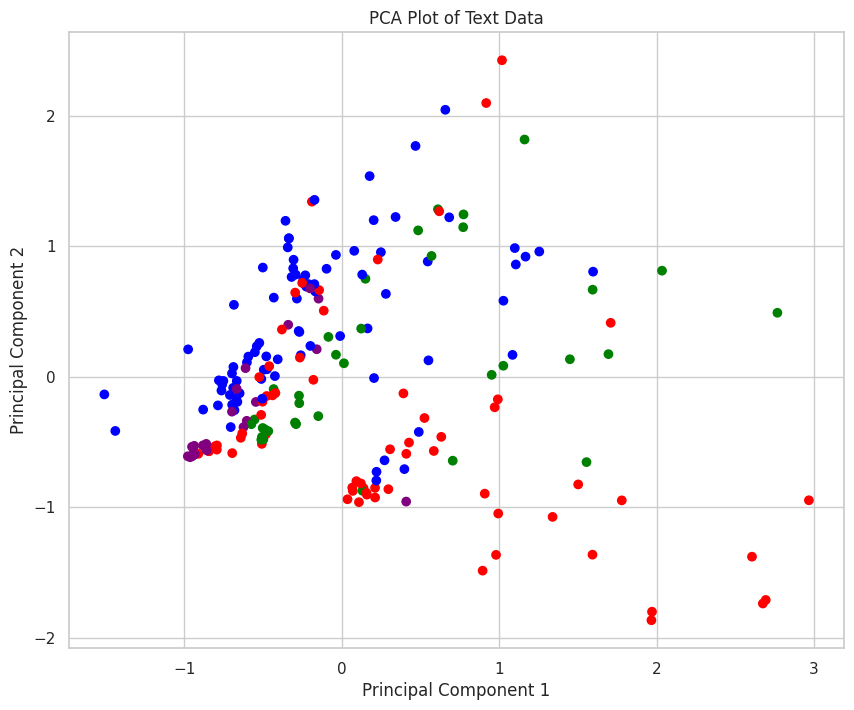

In [ ]:
#Principal Component Analysis (PCA) Plot:
from sklearn.decomposition import PCA
import numpy as np

# Create a color mapping dictionary
color_mapping = {'Main': 'blue', 'Note': 'red', 'Emotion': 'green', 'None': 'purple'}

# Map 'Name Tag' values to colors
name_tag_colors = [color_mapping[tag] for tag in name_tags]

# Perform PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(sentence_vectors.toarray())

# Create the PCA plot with colors
plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=name_tag_colors, cmap='viridis')
plt.title("PCA Plot of Text Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


<ipython-input-28-351491f7fd8f>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=name_tag_colors, cmap='viridis')


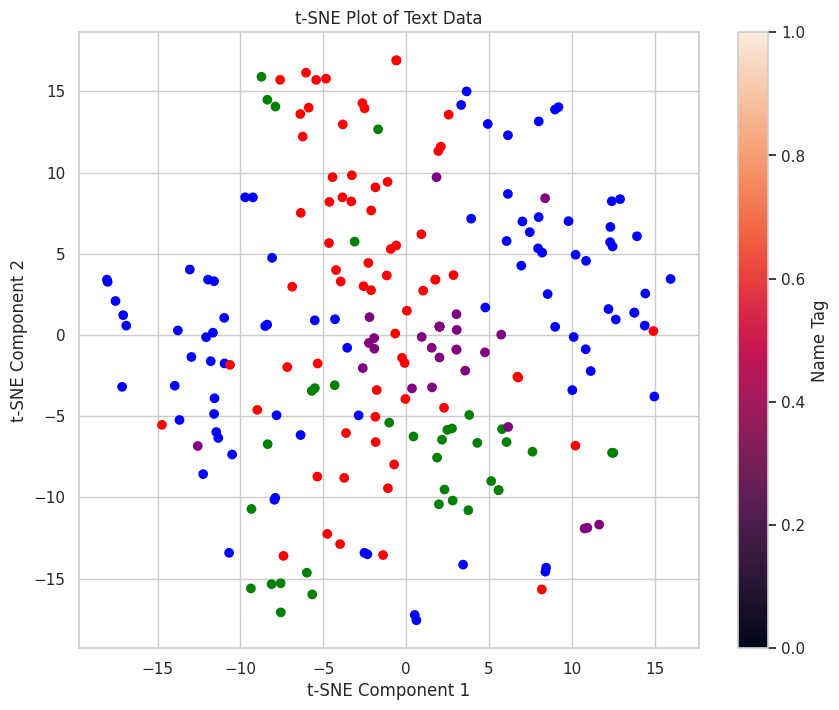

In [ ]:
#t-SNE (t-distributed Stochastic Neighbor Embedding) Plot:
from sklearn.manifold import TSNE

# Create a color mapping dictionary
color_mapping = {'Main': 'blue', 'Note': 'red', 'Emotion': 'green', 'None': 'purple'}

# Map 'Name Tag' values to colors
name_tag_colors = [color_mapping[tag] for tag in name_tags]

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
reduced_features = tsne.fit_transform(sentence_vectors.toarray())

# Create the t-SNE plot with colors
plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=name_tag_colors, cmap='viridis')
plt.title("t-SNE Plot of Text Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Name Tag")
plt.show()


# **Text Classification Model**

In [ ]:
#Logistic Regression as a baseline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# Initialize and train the model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)

# Calculate metrics
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions, average='weighted')
lr_recall = recall_score(y_test, lr_predictions, average='weighted')
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')
lr_log_loss = log_loss(y_test, lr_model.predict_proba(X_test))

print("Logistic Regression Metrics:")
print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1-Score: {lr_f1}")
print(f"Log Loss: {lr_log_loss}")


Logistic Regression Metrics:
Accuracy: 0.75
Precision: 0.7568181818181817
Recall: 0.75
F1-Score: 0.7465909090909091
Log Loss: 0.6541605350481202


In [ ]:
#NB
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions
nb_predictions = nb_model.predict(X_test)

# Calculate metrics
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='weighted')
nb_recall = recall_score(y_test, nb_predictions, average='weighted')
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')
nb_log_loss = log_loss(y_test, nb_model.predict_proba(X_test))

print("Naive Bayes Metrics:")
print(f"Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1-Score: {nb_f1}")
print(f"Log Loss: {nb_log_loss}")

Naive Bayes Metrics:
Accuracy: 0.6818181818181818
Precision: 0.7401515151515151
Recall: 0.6818181818181818
F1-Score: 0.6792339417339417
Log Loss: 1.0363951302148646


In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Calculate metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
rf_log_loss = log_loss(y_test, rf_model.predict_proba(X_test))

print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-Score: {rf_f1}")
print(f"Log Loss: {rf_log_loss}")



Random Forest Metrics:
Accuracy: 0.7727272727272727
Precision: 0.7920454545454546
Recall: 0.7727272727272727
F1-Score: 0.774914924647545
Log Loss: 0.668302484230567


In [ ]:
#decision trees
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Trees model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)

# Calculate metrics
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')
dt_log_loss = log_loss(y_test, dt_model.predict_proba(X_test))

print("Decision Trees Metrics:")
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1-Score: {dt_f1}")
print(f"Log Loss: {dt_log_loss}")


Decision Trees Metrics:
Accuracy: 0.6818181818181818
Precision: 0.7400568181818182
Recall: 0.6818181818181818
F1-Score: 0.6997893372224924
Log Loss: 11.46843516926455


In [ ]:
#xgBoost:using label encoding to convert your class labels into numeric values.
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit the encoder on the unique class labels in y_train
label_encoder.fit(y_train)

# Transform y_train to numeric labels
y_train_encoded = label_encoder.transform(y_train)

# Initialize and train the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train_encoded)  # Use y_train_encoded as the target

# Make predictions
xgb_predictions = xgb_model.predict(X_test)


In [ ]:
#Label Encoding for Test Data:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit the encoder on the unique class labels in y_train
label_encoder.fit(y_train)

# Transform y_train and y_test to numeric labels
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train_encoded)  # Use y_train_encoded as the target

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Calculate metrics for XGBoost
xgb_accuracy = accuracy_score(y_test_encoded, xgb_predictions)
xgb_precision = precision_score(y_test_encoded, xgb_predictions, average='weighted')
xgb_recall = recall_score(y_test_encoded, xgb_predictions, average='weighted')
xgb_f1 = f1_score(y_test_encoded, xgb_predictions, average='weighted')

# Now, calculate log loss
xgb_log_loss = log_loss(y_test_encoded, xgb_model.predict_proba(X_test))

print("XGBoost Metrics:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1-Score: {xgb_f1}")
print(f"Log Loss: {xgb_log_loss}")


XGBoost Metrics:
Accuracy: 0.75
Precision: 0.7820574162679427
Recall: 0.75
F1-Score: 0.7521498771498772
Log Loss: 0.7140229860937137


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# Build and train your neural network model here

# Make predictions
nn_predictions = model.predict(X_test)

# Calculate metrics
nn_accuracy = accuracy_score(y_test, nn_predictions)
nn_precision = precision_score(y_test, nn_predictions, average='weighted')
nn_recall = recall_score(y_test, nn_predictions, average='weighted')
nn_f1 = f1_score(y_test, nn_predictions, average='weighted')
nn_log_loss = log_loss(y_test, model.predict_proba(X_test))

print("Neural Network Metrics:")
print(f"Accuracy: {nn_accuracy}")
print(f"Precision: {nn_precision}")
print(f"Recall: {nn_recall}")
print(f"F1-Score: {nn_f1}")
print(f"Log Loss: {nn_log_loss}")


Neural Network Metrics:
Accuracy: 0.6818181818181818
Precision: 0.7344497607655502
Recall: 0.6818181818181818
F1-Score: 0.6965601965601965
Log Loss: 11.46843516926455


In [ ]:
import pandas as pd

# Create a dictionary to store the metrics
metrics_data = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'Log Loss': []
}

# Add metrics for each model
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Decision Trees', 'XGBoost', 'Neural Network']
metrics = [lr_accuracy, nb_accuracy, rf_accuracy, dt_accuracy, xgb_accuracy, nn_accuracy]
precisions = [lr_precision, nb_precision, rf_precision, dt_precision, xgb_precision,nn_precision]
recalls = [lr_recall, nb_recall, rf_recall, dt_recall, xgb_recall, nn_recall]
f1_scores = [lr_f1, nb_f1, rf_f1, dt_f1, xgb_f1, nn_f1]
log_losses = [lr_log_loss, nb_log_loss, rf_log_loss, dt_log_loss, xgb_log_loss, nn_log_loss]

for model, accuracy, precision, recall, f1, log_loss in zip(models, metrics, precisions, recalls, f1_scores, log_losses):
    metrics_data['Model'].append(model)
    metrics_data['Accuracy'].append(accuracy)
    metrics_data['Precision'].append(precision)
    metrics_data['Recall'].append(recall)
    metrics_data['F1-Score'].append(f1)
    metrics_data['Log Loss'].append(log_loss)

# Create a DataFrame from the metrics data
metrics_df = pd.DataFrame(metrics_data)

# Display the table
metrics_df


,Model,Accuracy,Precision,Recall,F1-Score,Log Loss
0,Logistic Regression,0.750000,0.756818,0.750000,0.746591,0.654161
1,Naive Bayes,0.681818,0.740152,0.681818,0.679234,1.036395
2,Random Forest,0.772727,0.792045,0.772727,0.774915,0.668302
3,Decision Trees,0.681818,0.740057,0.681818,0.699789,11.468435
4,XGBoost,0.750000,0.782057,0.750000,0.752150,0.714023
5,Neural Network,0.681818,0.734450,0.681818,0.696560,11.468435


## **Based on these metrics:**

**Random Forest** stands out as the best model with the highest accuracy, precision, recall, and F1-score. It also has a reasonable log loss, indicating good predictive performance. Random Forest models tend to perform well on a wide range of tasks.

**XGBoost** also performs well, with high precision and F1-score, but it has slightly lower accuracy and recall compared to Random Forest. It has a reasonable log loss, making it a strong choice as well.

**Logistic Regression and Naive Bayes** perform reasonably well and may be good choices if you prioritize simplicity and interpretability.

**Decision Trees and the Neural Network** have the lowest accuracy and F1-scores, and they have high log loss values. They might not be the best choices unless there are specific reasons to prefer them.